# Wojciech Pragłowski

## Laboratorium 10 - regresja liniowa

### Zadanie 1

In [1]:
import random
import numpy as np

n = 10
x_list, y_list = [], []
for i in range(n):
    i = random.randint(1,n)
    x_list.append(i)

for i in range(n):
    i = random.randint(1,n)
    y_list.append(i)
    
x_avg = sum(x_list)/len(x_list)
y_avg = sum(y_list)/len(y_list)

#### Współczynnik korelacji liniowej Pearsona

In [2]:
def pearson(x, y, n, xavg, yavg):
    up_sum = 0
    down_x_sum = 0
    down_y_sum = 0
    
    for i in range(n):
        up_counter = (x[i] - xavg)*(y[i] - yavg)
        up_sum += up_counter
        
        down_x_counter = (x[i] - xavg)**2
        down_x_sum += down_x_counter
        
        down_y_counter = (y[i] - yavg)**2
        down_y_sum += down_y_counter
        
    r = up_sum / ((down_x_sum**0.5)*(down_y_sum**0.5))
    return r


print("Współczynnik korelacji Pearsona: ",pearson(x_list, y_list, n, x_avg, y_avg), "dla n =", n)

Współczynnik korelacji Pearsona:  0.5080132852473562 dla n = 10


### Zadanie 2

#### Współczynniki prostej regresji

In [3]:
def factors(x, y, n):
    up_sum = 0
    down_sum = 0
    
    for i in range(n):
        up_counter = (x_list[i] - x_avg)*(y_list[i] - y_avg)
        up_sum += up_counter
        
        down_counter = (x_list[i] - x_avg)**2
        down_sum += down_counter
    
    a_factor = up_sum / down_sum
    b_factor = y_avg - (a_factor*x_avg)
    
    return a_factor, b_factor

print("Współczynniki prostej regresji a i b:",factors(x_list, y_list, n))

Współczynniki prostej regresji a i b: (0.4294871794871794, 1.8076923076923084)


### Zadanie 3 

In [4]:
import pandas as pd

dane_anscombe = pd.read_html("https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a")
dane_anscombe[1]

,I,I.1,II,II.1,III,III.1,IV,IV.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [11]:
column_names = dane_anscombe[1].columns.to_list()
values = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
kolumny = []
# cols = []

for j in range(len(column_names)):
    vals = dane_anscombe[1][column_names[j]].to_list()
    vals.pop(0)
    kolumny.append(vals)
    cols[j] = [float(i) for i in kolumny[j]]
print(cols[2])

[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]


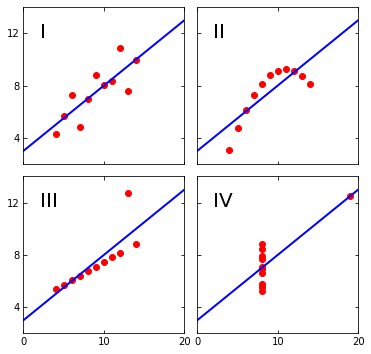

In [12]:
import matplotlib.pyplot as plt
import numpy as np

datasets = {
    'I': (cols[2], cols[1]),
    'II': (cols[2], cols[3]),
    'III': (cols[4], cols[5]),
    'IV': (cols[6], cols[7])
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'ro')

    p1, p0 = np.polyfit(x, y, deg=1)
    ax.axline(xy1=(0, p0), slope=p1, color='b', lw=2)

plt.show()

### Zadanie 4

In [13]:
x123_avg = sum(cols[2])/len(cols[2])
y1_avg = sum(cols[1])/len(cols[1])
y2_avg = sum(cols[3])/len(cols[3])
y3_avg = sum(cols[5])/len(cols[5])
x4_avg = sum(cols[6])/len(cols[6])
y4_avg = sum(cols[7])/len(cols[7])

print('Współczynnik korelacji Pearsona dla I kwarty:', pearson(cols[2], cols[1], 10, x123_avg, y1_avg))
print('Współczynnik korelacji Pearsona dla II kwarty:', pearson(cols[2], cols[3], 10, x123_avg, y2_avg))
print('Współczynnik korelacji Pearsona dla III kwarty:', pearson(cols[2], cols[5], 10, x123_avg, y3_avg))
print('Współczynnik korelacji Pearsona dla IV kwarty:', pearson(cols[6], cols[6], 10, x4_avg, y4_avg))

Współczynnik korelacji Pearsona dla I kwarty: 0.799003327391068
Współczynnik korelacji Pearsona dla II kwarty: 0.7815227099480371
Współczynnik korelacji Pearsona dla III kwarty: 0.8003069930547446
Współczynnik korelacji Pearsona dla IV kwarty: 0.9127067706998173


### Zadanie 5

#### I zestaw

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dane = pd.DataFrame(data = [cols[2], cols[1]])
dane_ = dane.T
dane_.columns=['x', 'y']

mod = smf.ols(formula='y ~ x', data=dane_)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 19 Dec 2021   Prob (F-statistic):            0.00217
Time:                        18:07:09   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### II zestaw

In [20]:
dane = pd.DataFrame(data = [cols[2], cols[3]])
dane_ = dane.T
dane_.columns=['x', 'y']

mod = smf.ols(formula='y ~ x', data=dane_)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 19 Dec 2021   Prob (F-statistic):            0.00218
Time:                        18:07:36   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### III zestaw

In [21]:
dane = pd.DataFrame(data = [cols[4], cols[5]])
dane_ = dane.T
dane_.columns=['x', 'y']

mod = smf.ols(formula='y ~ x', data=dane_)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 19 Dec 2021   Prob (F-statistic):            0.00218
Time:                        18:07:54   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.0

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### IV zestaw

In [22]:
dane = pd.DataFrame(data = [cols[6], cols[7]])
dane_ = dane.T
dane_.columns=['x', 'y']

mod = smf.ols(formula='y ~ x', data=dane_)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 19 Dec 2021   Prob (F-statistic):            0.00216
Time:                        18:08:10   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.0

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Seaborn

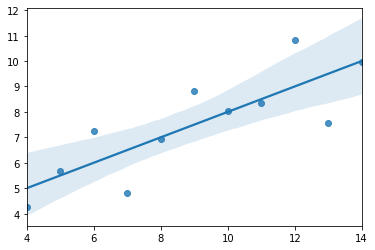

In [23]:
import seaborn as sns

sns.regplot(x=cols[2], y=cols[1], fit_reg=True)
plt.show()

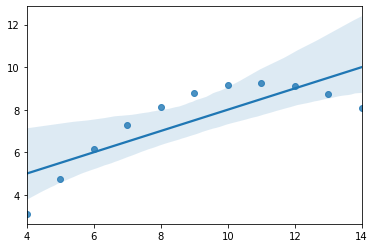

In [24]:
sns.regplot(x=cols[2], y=cols[3], fit_reg=True)
plt.show()

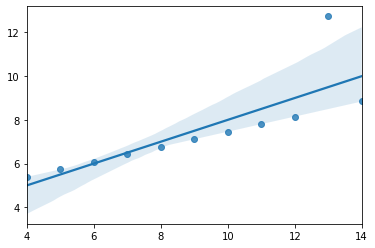

In [25]:
sns.regplot(x=cols[4], y=cols[5], fit_reg=True)
plt.show()

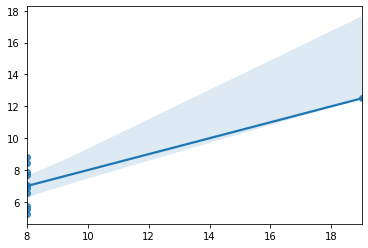

In [26]:
sns.regplot(x=cols[6], y=cols[7], fit_reg=True)
plt.show()